In [1]:
# Load the required Python libraries
import matplotlib.pyplot as plt
import xarray
import os

In [2]:
# To run, replace the empty path below with one of the options, depending on which site output
# (e.g. BEO, Council, Kougarok, or Teller) you would like to plot
output_file='/home/jovyan/output/cime_run_dirs/OLMT_AK-K64G_ICB20TRCNPRDCTCBC/run/ELM_output.nc'

# Output locations using provided NGEE-Arctic demos:
#'/home/jovyan/output/cime_run_dirs/OLMT_AK-BEOG_ICB20TRCNPRDCTCBC/run/ELM_output.nc'
#'/home/jovyan/output/cime_run_dirs/OLMT_AK-CLG_ICB20TRCNPRDCTCBC/run/ELM_output.nc'
#'/home/jovyan/output/cime_run_dirs/OLMT_AK-K64G_ICB20TRCNPRDCTCBC/run/ELM_output.nc'
#'/home/jovyan/output/cime_run_dirs/OLMT_AK-TLG_ICB20TRCNPRDCTCBC/run/ELM_output.nc'

In [3]:
# Load model output data into xarray format. 
# squeeze removes an empty grid cell dimension assuming this is a single point run
elm_output=xarray.open_dataset(output_file).squeeze()

In [4]:
# show the contents of elm_output
print(elm_output)

<xarray.Dataset>
Dimensions:                   (levgrnd: 15, levlak: 10, levdcmp: 15,
                               time: 60226, hist_interval: 2, ltype: 9,
                               natpft: 17)
Coordinates:
  * levgrnd                   (levgrnd) float32 0.007101 0.02792 ... 21.33 35.18
  * levlak                    (levlak) float32 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp                   (levdcmp) float32 0.007101 0.02792 ... 21.33 35.18
  * time                      (time) object 1850-01-01 00:00:00 ... 2015-01-0...
Dimensions without coordinates: hist_interval, ltype, natpft
Data variables: (12/562)
    mcdate                    (time) int32 ...
    mcsec                     (time) int32 ...
    mdcur                     (time) int32 ...
    mscur                     (time) int32 ...
    nstep                     (time) int32 ...
    time_bounds               (time, hist_interval) object ...
    ...                        ...
    leaf_npimbalance          (time) float3

Text(0.5, 1.0, 'Total Vegetation Carbon')

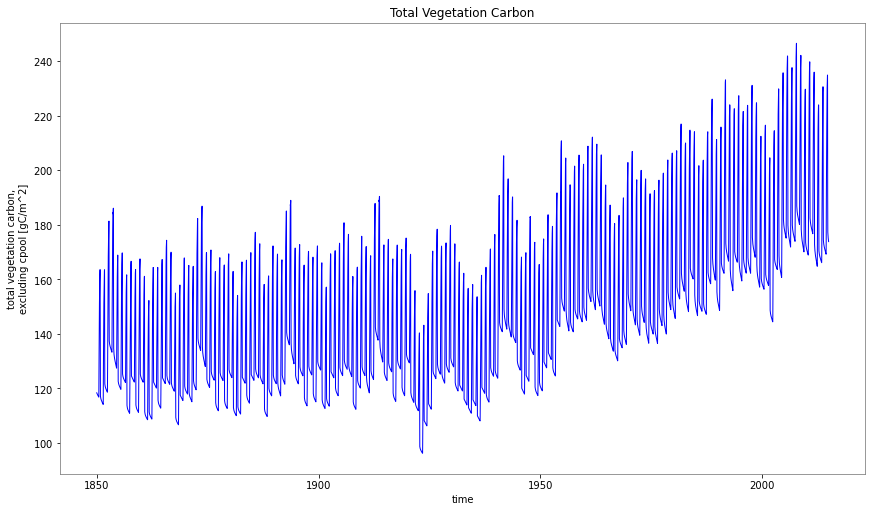

In [5]:
# Create a single plot of Total Vegetation Carbon
TOTVEGC = elm_output['TOTVEGC']
fig, ax = plt.subplots(clear=True, figsize=(12,7))
TOTVEGC.plot(ax=ax,linestyle='-',color='blue',label='Total vegetation C')
ax.set_title('Total Vegetation Carbon')

Text(0.5, 1.0, 'Leaf Carbon')

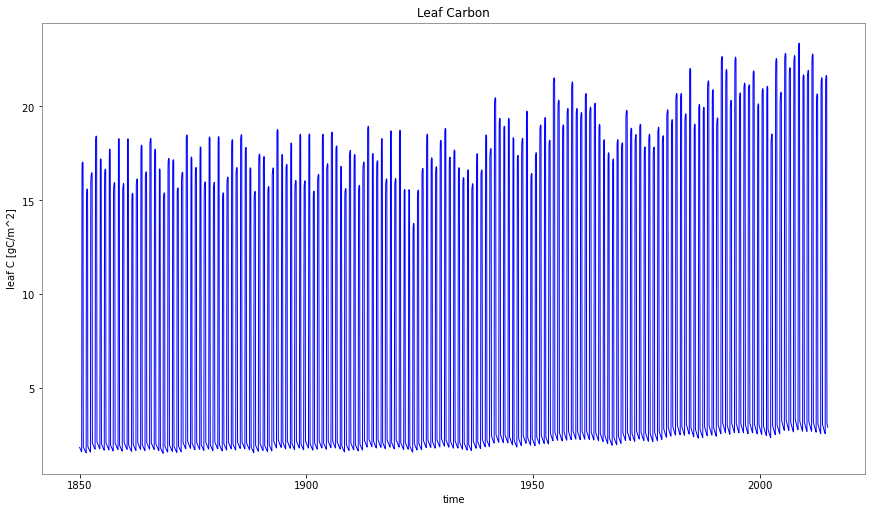

In [6]:
# Create a single plot of Leaf Carbon
LEAFC = elm_output['LEAFC']
fig, ax = plt.subplots(clear=True, figsize=(12,7))
LEAFC.plot(ax=ax,linestyle='-',color='blue',label='Leaf C')
ax.set_title('Leaf Carbon')

[Text(0.5, 1.0, 'N fluxes'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'N flux (g N m$^{-2}$ day$^{-1}$)')]

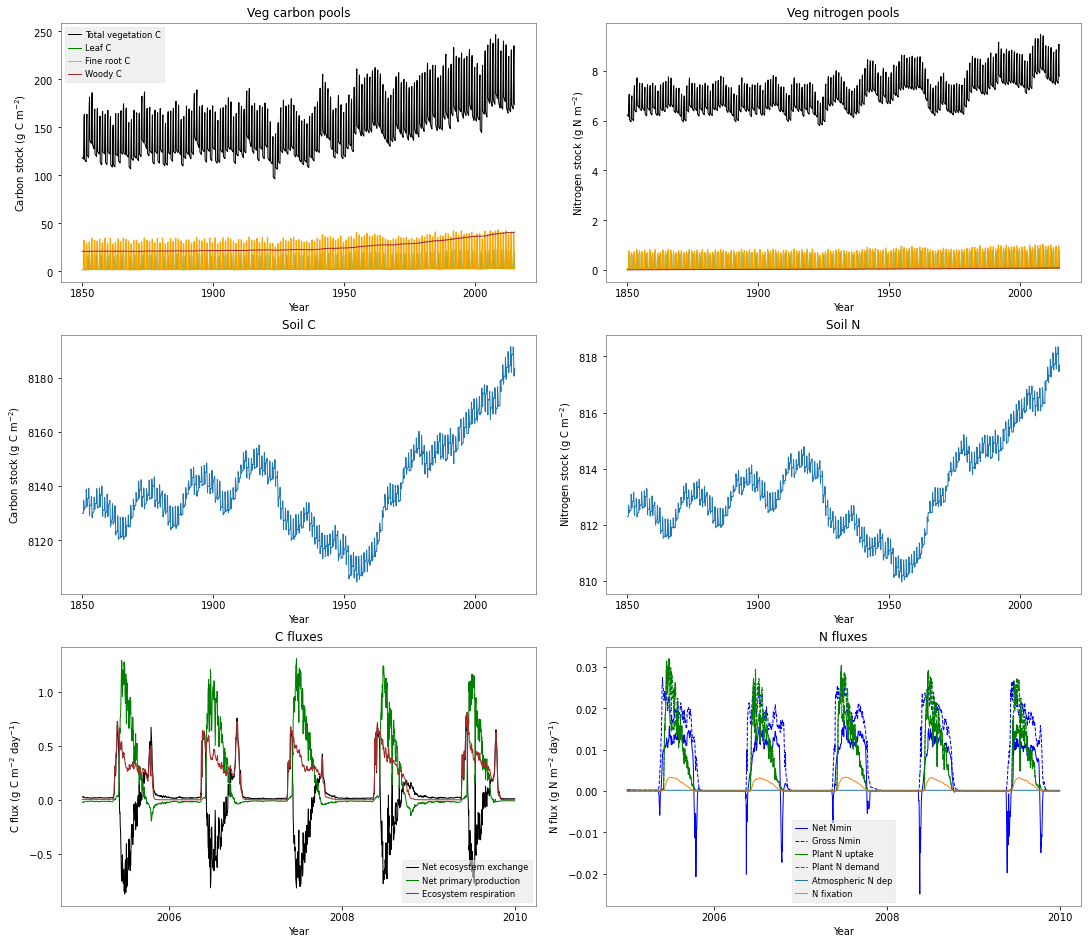

In [7]:
# Plot the carbon and nitrogen budgets
# Set up a figure with three axes
fig,a=plt.subplots(nrows=3,ncols=2,clear=True,num='Carbon budgets',figsize=(15,13))

ax=a[0,0]
elm_output['TOTVEGC'].plot(ax=ax,linestyle='-',color='black',label='Total vegetation C')
elm_output['LEAFC'].plot(ax=ax,linestyle='-',color='green',label='Leaf C')
elm_output['FROOTC'].plot(ax=ax,linestyle='-',color='orange',label='Fine root C')
(elm_output['DEADSTEMC']+elm_output['LIVESTEMC']+elm_output['DEADCROOTC']+elm_output['LIVECROOTC']).plot(ax=ax,linestyle='-',color='brown',label='Woody C')
ax.legend()
ax.set(title='Veg carbon pools',xlabel='Year',ylabel='Carbon stock (g C m$^{-2}$)')


# Vegetation N
ax=a[0,1]
elm_output['TOTVEGN'].plot(ax=ax,linestyle='-',color='black',label='Total vegetation C')
elm_output['LEAFN'].plot(ax=ax,linestyle='-',color='green',label='Leaf C')
elm_output['FROOTN'].plot(ax=ax,linestyle='-',color='orange',label='Fine root C')
# This is showing a negative N content for live coarse roots, which seems like a model issue we should check on...
(elm_output['DEADSTEMN']+elm_output['LIVESTEMN']+elm_output['DEADCROOTN']+elm_output['LIVECROOTN']).plot(ax=ax,linestyle='-',color='brown',label='Woody C')
ax.set(title='Veg nitrogen pools',xlabel='Year',ylabel='Nitrogen stock (g N m$^{-2}$)')

# Soil C
ax=a[1,0]
elm_output['TOTSOMC'].plot(ax=ax,label='Soil C')
ax.set(title='Soil C',xlabel='Year',ylabel='Carbon stock (g C m$^{-2}$)')

# Soil N
ax=a[1,1]
elm_output['TOTSOMN'].plot(ax=ax,label='Soil N')
ax.set(title='Soil N',xlabel='Year',ylabel='Nitrogen stock (g C m$^{-2}$)')

# C fluxes. Just plotting 5 years
timerange=slice('2005-01-01','2010-01-01')
ax=a[2,0]
(elm_output['NEE']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='-',color='black',label='Net ecosystem exchange')
(elm_output['NPP']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='-',color='green',label='Net primary production')
(elm_output['HR']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='-',color='brown',label='Ecosystem respiration')
ax.legend()
ax.set(title='C fluxes',xlabel='Year',ylabel='C flux (g C m$^{-2}$ day$^{-1}$)')

# N fluxes
ax=a[2,1]
(elm_output['NET_NMIN']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='-',color='blue',label='Net Nmin')
(elm_output['GROSS_NMIN']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='--',color='blue',label='Gross Nmin')
(elm_output['SMINN_TO_PLANT']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='-',color='green',label='Plant N uptake')
(elm_output['PLANT_NDEMAND']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='--',color='green',label='Plant N demand')

# Skipping N dep because it's very small
(elm_output['NDEP_TO_SMINN']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='-',color='C0',label='Atmospheric N dep')
(elm_output['NFIX_TO_SMINN']*24*3600).sel(time=timerange).plot(ax=ax,linestyle='-',color='C1',label='N fixation')
ax.legend()
ax.set(title='N fluxes',xlabel='Year',ylabel='N flux (g N m$^{-2}$ day$^{-1}$)')

[Text(0.5, 1.0, 'Soil moisture'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Depth (m)'),
 (3.0, 0.0)]

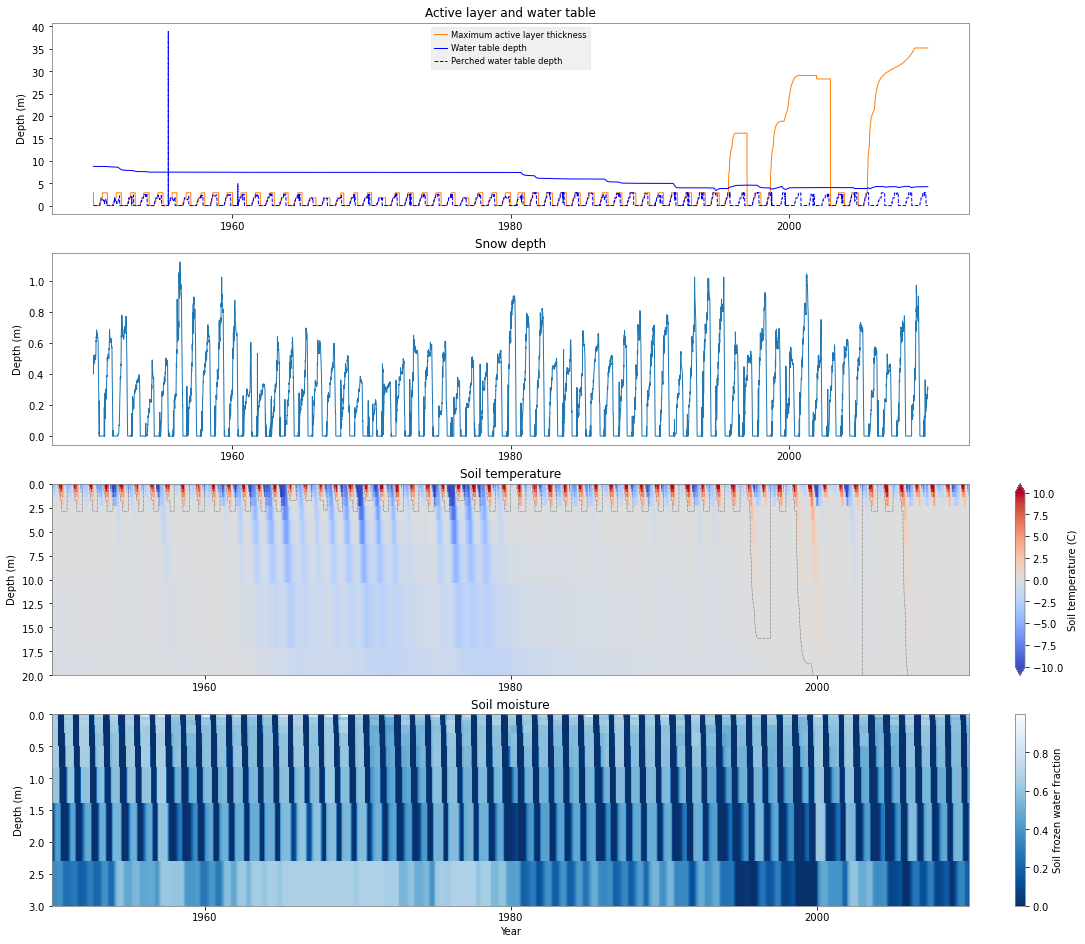

In [8]:
# Soil temperature and freezing

# Set up a figure with three rows
fig,a=plt.subplots(nrows=4,clear=True,num='Soil temperature and ice',figsize=(15,13))

# Subset output to the 1950-2010 period
timerange=slice('1950-01-01','2010-01-01')

ax=a[0]
elm_output['ALTMAX'].sel(time=timerange).plot(ax=ax,label='Maximum active layer thickness',color='C1')
elm_output['ZWT'].sel(time=timerange).plot(ax=ax,label='Water table depth',color='blue')
elm_output['ZWT_PERCH'].sel(time=timerange).plot(ax=ax,label='Perched water table depth',color='blue',linestyle='--')
ax.set(title='Active layer and water table',xlabel='',ylabel='Depth (m)')
ax.legend()

ax=a[1]
elm_output['SNOW_DEPTH'].sel(time=timerange).plot(ax=ax,label='Snow depth')
ax.set(title='Snow depth',xlabel='',ylabel='Depth (m)')

ax=a[2]
(elm_output['TSOI']-273.15).sel(time=timerange).T.plot(ax=ax,cbar_kwargs={'label':'Soil temperature (C)'},center=0,vmin=-10,vmax=10,cmap='coolwarm')
elm_output['ALTMAX'].sel(time=timerange).plot(ax=ax,label='Maximum active layer thickness',color='k',linestyle=':',linewidth=0.5)
ax.set(title='Soil temperature',xlabel='',ylabel='Depth (m)',ylim=(20,0))

ax=a[3]
(elm_output['SOILICE']/(elm_output['SOILLIQ']+elm_output['SOILICE'])).sel(time=timerange).T.plot(ax=ax,cbar_kwargs={'label':'Soil frozen water fraction'},cmap='Blues_r')
ax.set(title='Soil moisture',xlabel='Year',ylabel='Depth (m)',ylim=(3,0))